In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier


In [2]:
(xTrain, yTrain), (xTest, yTest) = fashion_mnist.load_data()


In [4]:
xTrain, xVal, yTrain, yVal = train_test_split(
    xTrain, yTrain, test_size=0.15, random_state=0)
tShape1 = xTrain.shape[0]
tShape2 = xTrain.shape[1]
tShape3 = xTrain.shape[2]
xTrain = xTrain.reshape(tShape1, tShape2*tShape3)
tV, tShape2, tShape3 = xVal.shape
xVal = xVal.reshape(tV, tShape2*tShape3)
tT, tShape2, tShape3 = xTest.shape
xTest = xTest.reshape(tT, tShape2*tShape3)


In [5]:
xTrain = xTrain.reshape(tShape1, tShape2*tShape3)
xVal = xVal.reshape(tV, tShape2*tShape3)
xTest = xTest.reshape(tT, tShape2*tShape3)


In [6]:
def plotCurve(trainLoss, valLoss):
    plt.plot(trainLoss)
    plt.plot(valLoss)
    plt.legend(['train', 'val'])
    plt.xlabel("Total Epochs")
    plt.ylabel("Total Loss")
    plt.title("Curve between Loss and Epochs")
    plt.show()


In [7]:
def runMLP(activation_function="relu", learning_rate_init=0.001, hidden_layer_sizes=(256, 32)):
    MLP = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=0, max_iter=1,
                        activation=activation_function, learning_rate_init=learning_rate_init)
    trainLoss = []
    valLoss = []
    i = 0
    if learning_rate_init != 0.001:
        print("Learning Rate: ", learning_rate_init)
    while i < 61:
        for m in range(0, 51001, 256):
            MLP.partial_fit(xTrain[m:m+256],
                            yTrain[m:m+256], classes=np.unique(yTrain))
        trainLoss.append(log_loss(yTrain, MLP.predict_proba(xTrain)))
        valLoss.append(log_loss(yVal, MLP.predict_proba(xVal)))
        i += 1
    plotCurve(trainLoss, valLoss)
    if hidden_layer_sizes != (256, 32):
        print("Hidden Layer Size: ", hidden_layer_sizes)
    print("MLP Score on Validation is", MLP.score(xVal, yVal))
    print("MLP Score on Training is", MLP.score(xTrain, yTrain))


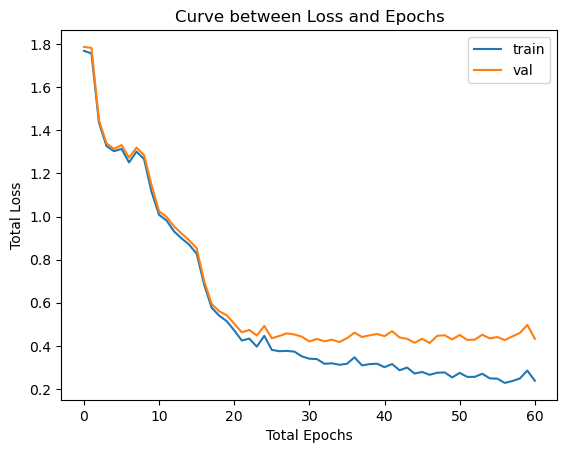

MLP Score on Validation is 0.8716666666666667
MLP Score on Training is 0.9137647058823529


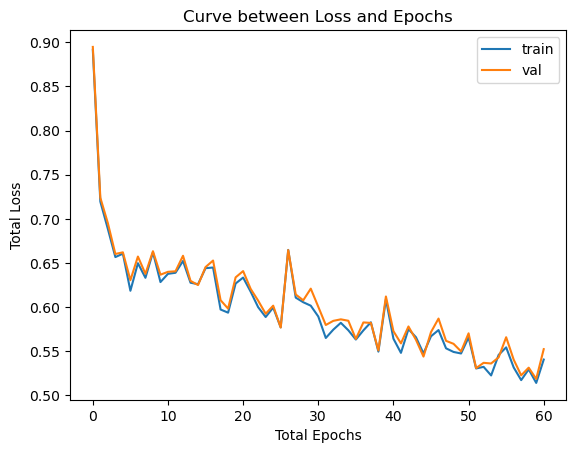

MLP Score on Validation is 0.7988888888888889
MLP Score on Training is 0.8047647058823529


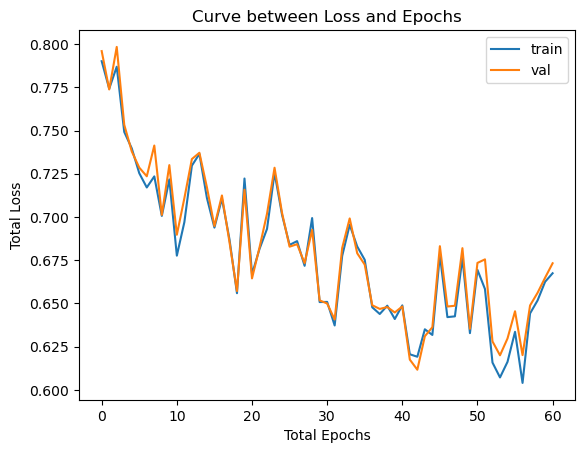

MLP Score on Validation is 0.7207777777777777
MLP Score on Training is 0.724392156862745


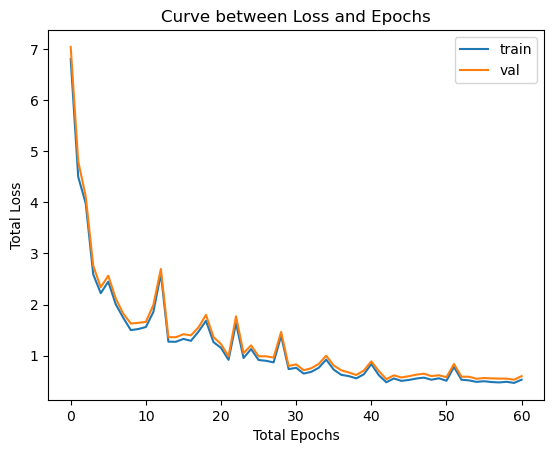

MLP Score on Validation is 0.8231111111111111
MLP Score on Training is 0.8333725490196079


In [8]:
runMLP()
runMLP('logistic')
runMLP('tanh')
runMLP('identity')


# Learning Rates values


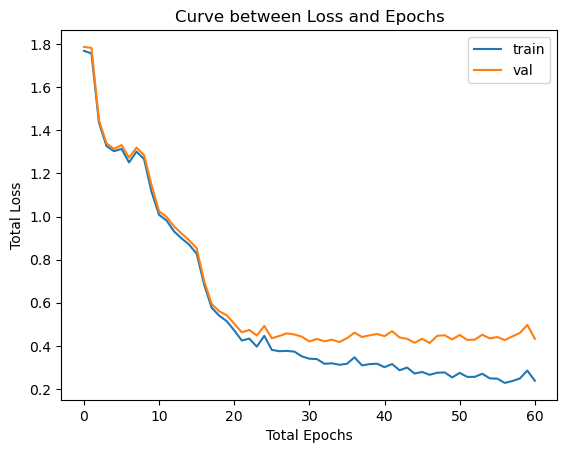

MLP Score on Validation is 0.8716666666666667
MLP Score on Training is 0.9137647058823529
Learning Rate:  0.01


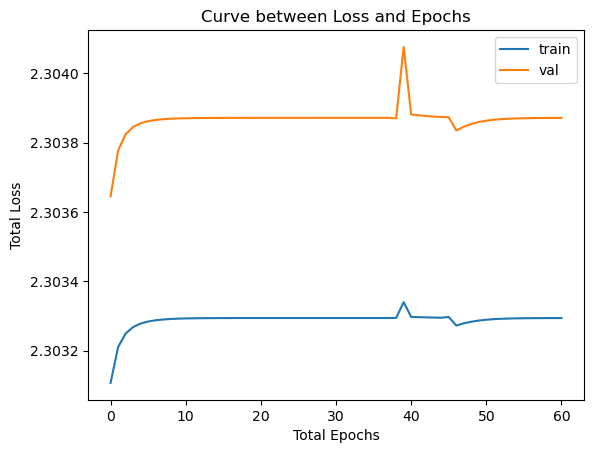

MLP Score on Validation is 0.09766666666666667
MLP Score on Training is 0.10041176470588235
Learning Rate:  0.1


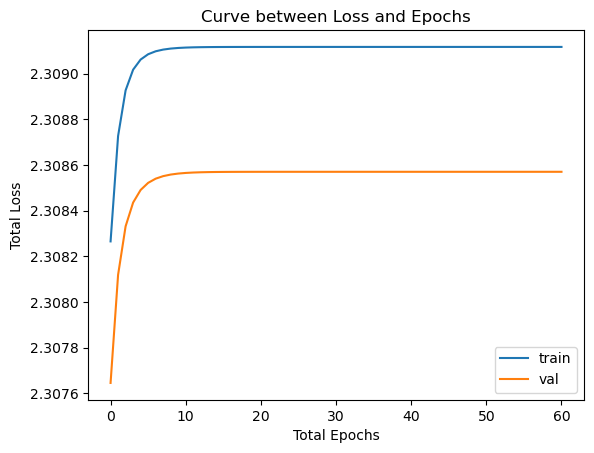

MLP Score on Validation is 0.10222222222222223
MLP Score on Training is 0.0996078431372549


In [9]:
runMLP()
runMLP(learning_rate_init=0.01)
runMLP(learning_rate_init=0.1)


# For given neuron sizes


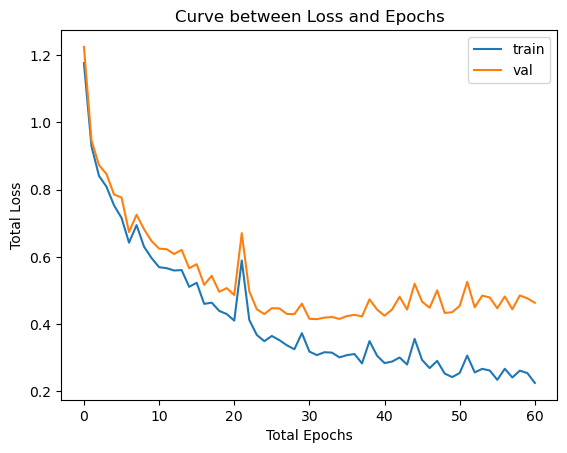

Hidden Layer Size:  (200, 32)
MLP Score on Validation is 0.8715555555555555
MLP Score on Training is 0.920843137254902


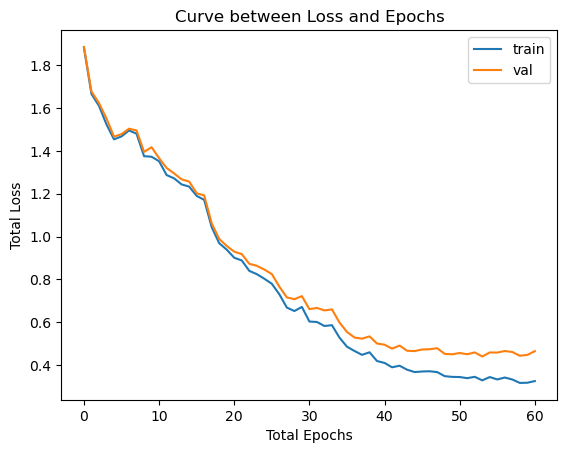

Hidden Layer Size:  (128, 16)
MLP Score on Validation is 0.8633333333333333
MLP Score on Training is 0.8875294117647059


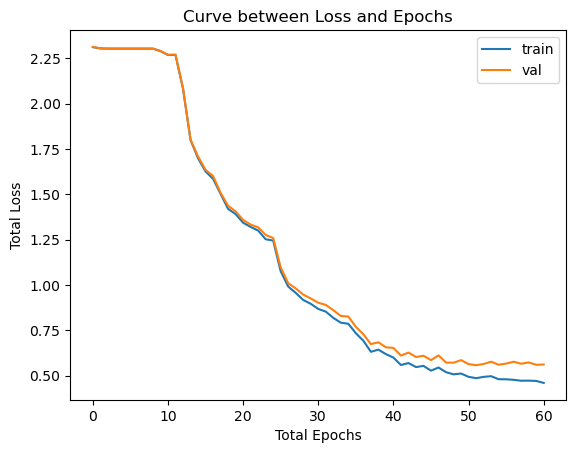

Hidden Layer Size:  (64, 8)
MLP Score on Validation is 0.8076666666666666
MLP Score on Training is 0.8226470588235294


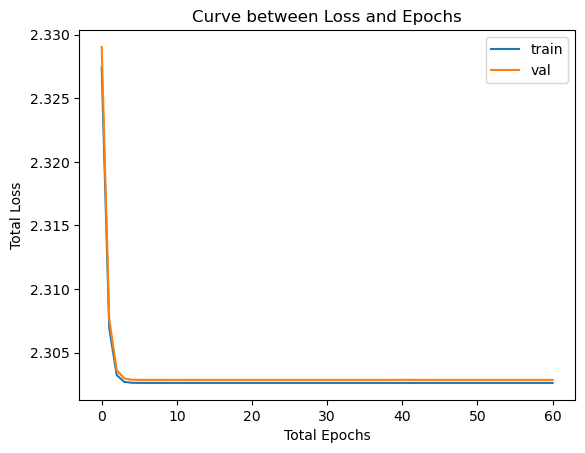

Hidden Layer Size:  (32, 4)
MLP Score on Validation is 0.09666666666666666
MLP Score on Training is 0.10058823529411764


In [11]:
runMLP(hidden_layer_sizes=(200, 32))
runMLP(hidden_layer_sizes=(128, 16))
runMLP(hidden_layer_sizes=(64, 8))
runMLP(hidden_layer_sizes=(32, 4))


In [12]:
def printRes(gS):
    print("The results on grid search are:")
    print("Best Parameters: ", gS.best_params_)
    print("Best Score: ", gS.best_score_)
    print("Best Estimator: ", gS.best_estimator_)
    print("Training Score: ", gS.score(xTrain, yTrain))
    print("Validation Score: ", gS.score(xVal, yVal))
    print("Test Score: ", gS.score(xTest, yTest))


In [13]:
MLP = MLPClassifier(random_state=0, early_stopping=True, max_iter=80)
parameters = {
    'alpha': [1e-4, 2e-4, 5e-5],
    'tol': [1e-4, 1e-5, 1e-3],
    'learning_rate_init': [0.001, 0.002, 0.0005],
}
gS = GridSearchCV(estimator=MLP, param_grid=parameters,
                  n_jobs=-1, cv=5, verbose=2, refit=True)
gS.fit(xTrain, yTrain)
printRes(gS)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters:  {'alpha': 0.0002, 'learning_rate_init': 0.0005, 'tol': 0.0001}
Best Score:  0.8618235294117647
Best Estimator:  MLPClassifier(alpha=0.0002, early_stopping=True, learning_rate_init=0.0005,
              random_state=0)
Training Score:  0.8967647058823529
Validation Score:  0.8713333333333333
Test Score:  0.8549
